In [1]:
import math
import os

from matplotlib.pyplot import cm

from animation.scene import Video, GIFfromMP4Video
from spaces.threeD import State
from spaces.twoD import SGDVisOneVariable

# Momentum

In [2]:
# 3d surfaces
# test functions
from spaces.threeD import State
from spaces.twoD import SGDVisOneVariable

state = State(
    space_lim_min=-7,
    space_lim_max=7,
    x_initial=-6,
    y_initial=0,
    test_function="parabolic",
    iteration=240,
)

steps_standard = state.run_gd(epsilon=0.001, alpha=0.9, nesterov=False)
steps_nesterov = state.run_gd(epsilon=0.001, alpha=0.9, nesterov=True)
steps_adam = state.run_adam(epsilon=0.01)
steps_adagrad = state.run_adagrad(epsilon=0.1)
steps_rmsprop = state.run_rmsprop(epsilon=0.1)

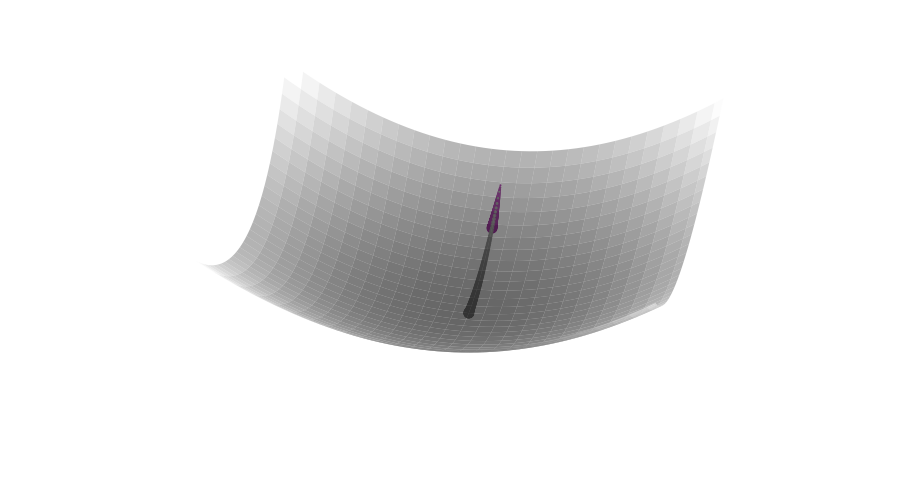

In [3]:
state.plot_steps(
    [
        # steps_standard,
        # steps_nesterov,
        # steps_adam,
        steps_adagrad,
        steps_rmsprop,
    ],
    colors=["purple", "gray", "green", "red"],
    steps_until_n=90,
    n_back=90,
)

In [4]:
for i in range(240):
    file_path = "frames/plot_{0:03}.png".format(i)
    fig = state.plot_steps(
        [steps_adagrad, steps_rmsprop],
        steps_until_n=i,
        azimuth=5 + 5 * math.log(i + 1),
        elevation=20 + 6 * math.log(i + 1),
        color_map=cm.gray,
        n_back=20,
        plot_title="Adagrad (blue) vs RMSProp (green)",
        colors=["blue", "green"],
    )
    fig.savefig(file_path)

In [5]:
FILE_NAME_WO_EXTENSION = "adagrad-vs-rmsprop"
video = Video(dir_to_save="frames", video_name=FILE_NAME_WO_EXTENSION, frame_rate=29)
cmd_video = video.get_fmpeg_video_cmd()
os.system(cmd_video)

video

Video('adagrad-vs-rmsprop.mp4', 29 fps, with '1920x1080'p resolution)

In [34]:
gif = GIFfromMP4Video(file_name=FILE_NAME_WO_EXTENSION, dir_to_save="", frame_rate=29)
cmd_gif = gif.get_fmpeg_gif_cmd()
os.system(cmd_gif)

gif

GIF('adagrad-vs-rmsprop.gif' from 'adagrad-vs-rmsprop.mp4')